<a href="https://colab.research.google.com/github/tiffanyndanu/Hass-Consulting-Company/blob/main/Hass_Consulting_Company_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. DEFINING THE QUESTION.**

# a) Specifying the question

Study the factors that affect housing prices using the given information on real estate properties that has been collected over the past few months. Later onwards, create a model that will allow the company(Hass Cosulting Company) to accurately predict the sale of prices upon being provided with the predictor variables. 

# b) Defining the metric for success



The model that will be considered a succes will be the one that provides the most accurate sale of prices upon being provided with predictor variables.

# c) Understanding the context

Hasa Consulting Company has been in the real estate business for over 25 years. the analysis of real estate properties and further creation of a model will allow the company to predict the sale of prices. This will enhance the quality of decisiond to be made by the company.

# d) Recording the experimental design

The following are the steps taking during the study:

1.Read and exploring the dataset.

2.Define the appropriateness of the available data to answer the given question.

3.Find and deal with outliers, anomalies and missing data within the dataset.

4.Perform univariate, bivariate and multi-variate analysis recording observations.

5.Check for multi-collinearity.

6.Performing regression analysis.

7.Providing the receommendation based on the analysis.

8.Challenging the solution by providing insights on how to make model improvements.

# e) Data relevance

The provided information is on real estate properties that was collected over the past few months. It's relevant to Hass Consulting Company since it is a real estate company that is interested in building a model that wil allow the company to accurately predict the sale of prices upon being provided with the predictor variables.

# f) Appropriateness of data

# **2. READING THE DATA.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Before reading our dataset, we would like to ensure all columns are visible 

pd.set_option("display.max.columns", None)

In [3]:
# Loading the dataset
url = ('http://bit.ly/IndependentProjectWeek7Dataset') 

df = pd.read_csv(url)


# **3. CHECKING THE DATA.**

In [4]:
# Determining the no. of records in our dataset
#
df.shape

(21613, 20)

In [5]:
# Understanding our dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [6]:
# Preview of our dataset

df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
# Checking the columns in the dataset

df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

# **4. CLEANING**

In [8]:
# Checking for duplicates

df.duplicated().sum()

3

In [9]:
# Dropping duplicates

df = df.drop_duplicates()
df.duplicated().sum()

0

In [10]:
# Dropping unnecessary columns

df = df.drop(columns = 'id')
df = df.drop(columns = 'lat')
df = df.drop(columns = 'long')
df = df.drop(columns = 'zipcode')

In [11]:
# Checking for null values

df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
sqft_living15    0
sqft_lot15       0
dtype: int64

There are no null values.

In [12]:
#Standardizing column names

df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503


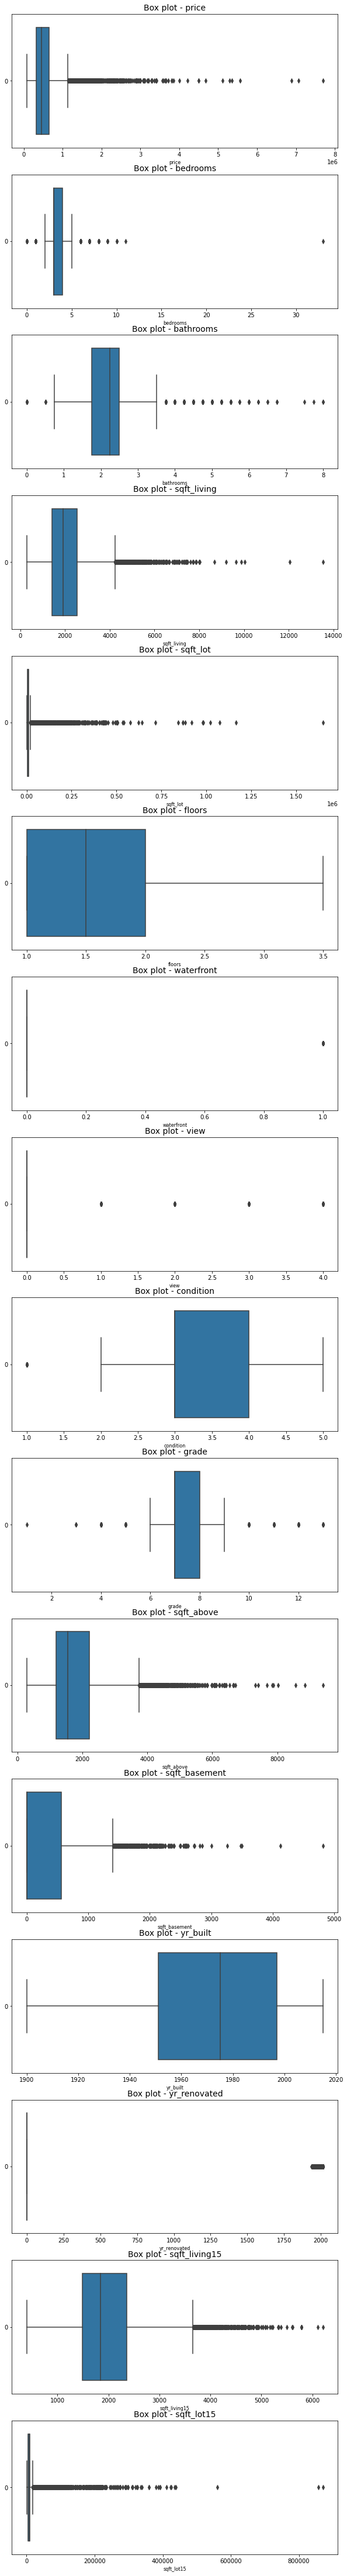

In [13]:
# Checking for outliers

# Plotting columns with numerical values only to check for outliers
col_names = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated',
       'sqft_living15', 'sqft_lot15']

fig, ax = plt.subplots(len(col_names), figsize= (10,80))

for i, col_val in enumerate(col_names):
  sns.boxplot(data = df[col_val], ax= ax[i], orient="h")
  df[col_val].value_counts()
  ax[i].set_title('Box plot - {}'.format(col_val), fontsize= 14)
  ax[i].set_xlabel(col_val, fontsize= 8)
plt.show()


In [14]:
# Confirming the amount of outliers

df1 = df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated',
       'sqft_living15', 'sqft_lot15']]
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1
((df1 < (Q1 - 1.5 * IQR)) | (df1 > (Q3 + 1.5 * IQR))).sum()

price            1139
bedrooms          546
bathrooms         571
sqft_living       572
sqft_lot         2425
floors              0
waterfront        163
view             2123
condition          30
grade            1911
sqft_above        611
sqft_basement     496
yr_built            0
yr_renovated      913
sqft_living15     544
sqft_lot15       2194
dtype: int64

There is a large number of outliers. If dropped, the amount of data might be insufficient for analysis.

# **5. EXPLORATORY ANALYSIS.**

### **UNIVARIATE**

## Measures of Central Tendency

In [15]:
# Statistical summary

df.describe(include='all')

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
count,2.161000e+04,21610.000000,21610.000000,21610.000000,2.161000e+04,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000
mean,5.401789e+05,3.370847,2.114739,2079.881212,1.510829e+04,1.494239,0.007543,0.234197,3.409440,7.656779,1788.347894,291.533318,1971.003609,84.322351,1986.518695,12769.031976
std,3.673876e+05,0.930110,0.770204,918.500299,4.142323e+04,0.539994,0.086523,0.766136,0.650764,1.175500,828.138723,442.596699,29.372639,401.499264,685.425781,27305.972464
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,399.000000,651.000000
25%,3.216125e+05,3.000000,1.750000,1425.500000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.619000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068875e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,6210.000000,871200.000000


In [16]:
# Mode
# Calculating mode across different columns

df.mode()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,350000.0,3.0,2.5,1300.0,5000.0,1.0,0.0,0.0,3.0,7.0,1300.0,0.0,2014.0,0.0,1540.0,5000.0
1,450000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# Mean

# Calculating mean across different columns

df.mean()



price            540178.944840
bedrooms              3.370847
bathrooms             2.114739
sqft_living        2079.881212
sqft_lot          15108.289820
floors                1.494239
waterfront            0.007543
view                  0.234197
condition             3.409440
grade                 7.656779
sqft_above         1788.347894
sqft_basement       291.533318
yr_built           1971.003609
yr_renovated         84.322351
sqft_living15      1986.518695
sqft_lot15        12769.031976
dtype: float64

In [18]:
# Median
# Calculating the median for across different columns

df.median()


price            450000.00
bedrooms              3.00
bathrooms             2.25
sqft_living        1910.00
sqft_lot           7619.00
floors                1.50
waterfront            0.00
view                  0.00
condition             3.00
grade                 7.00
sqft_above         1560.00
sqft_basement         0.00
yr_built           1975.00
yr_renovated          0.00
sqft_living15      1840.00
sqft_lot15         7620.00
dtype: float64

## Measures of Dispersion

In [19]:
#Range of columns
col = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated',
       'sqft_living15', 'sqft_lot15']
range = df[col].max()- df[col].min()
range

price            7625000.0
bedrooms              33.0
bathrooms              8.0
sqft_living        13250.0
sqft_lot         1650839.0
floors                 2.5
waterfront             1.0
view                   4.0
condition              4.0
grade                 12.0
sqft_above          9120.0
sqft_basement       4820.0
yr_built             115.0
yr_renovated        2015.0
sqft_living15       5811.0
sqft_lot15        870549.0
dtype: float64

In [20]:
# Standard Deviation

df[col].std()

price            367387.585054
bedrooms              0.930110
bathrooms             0.770204
sqft_living         918.500299
sqft_lot          41423.226737
floors                0.539994
waterfront            0.086523
view                  0.766136
condition             0.650764
grade                 1.175500
sqft_above          828.138723
sqft_basement       442.596699
yr_built             29.372639
yr_renovated        401.499264
sqft_living15       685.425781
sqft_lot15        27305.972464
dtype: float64

In [21]:
# Variance of each  column

df[col].var()

price            1.349736e+11
bedrooms         8.651041e-01
bathrooms        5.932137e-01
sqft_living      8.436428e+05
sqft_lot         1.715884e+09
floors           2.915930e-01
waterfront       7.486257e-03
view             5.869651e-01
condition        4.234936e-01
grade            1.381801e+00
sqft_above       6.858137e+05
sqft_basement    1.958918e+05
yr_built         8.627519e+02
yr_renovated     1.612017e+05
sqft_living15    4.698085e+05
sqft_lot15       7.456161e+08
dtype: float64

# Visualisation

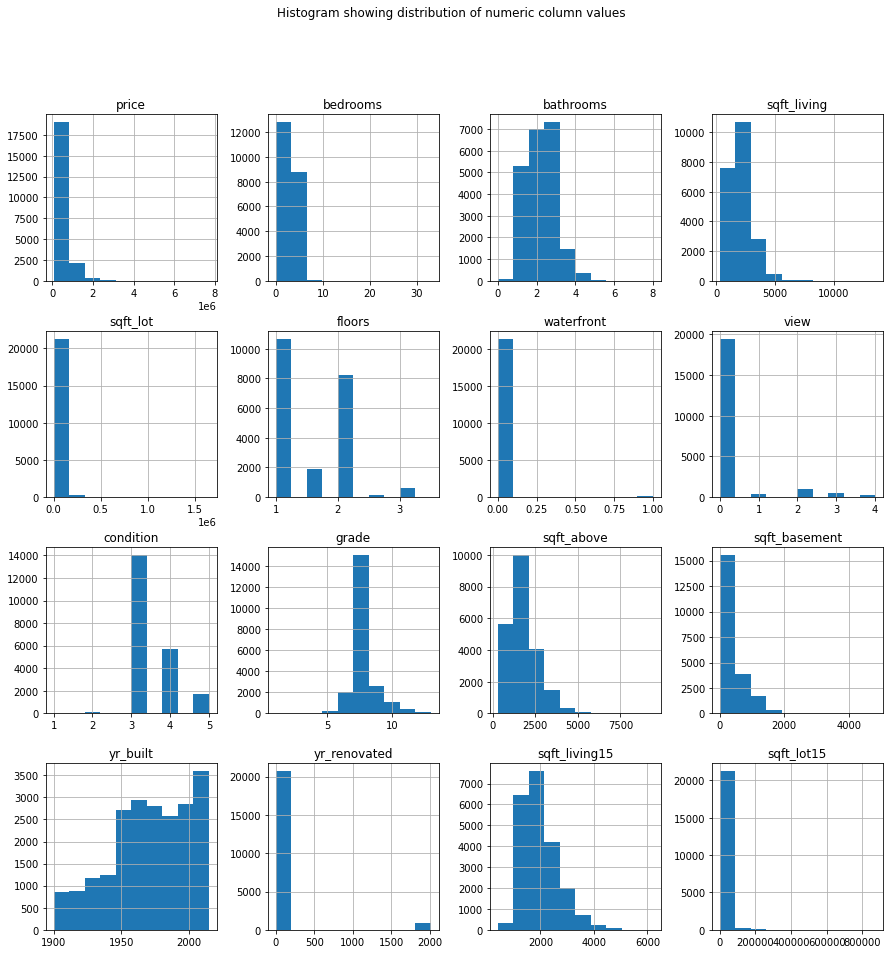

In [22]:
df.hist(bins=10, figsize=(15,15))
plt.suptitle("Histogram showing distribution of numeric column values")
plt.savefig('Histogram')
plt.show()

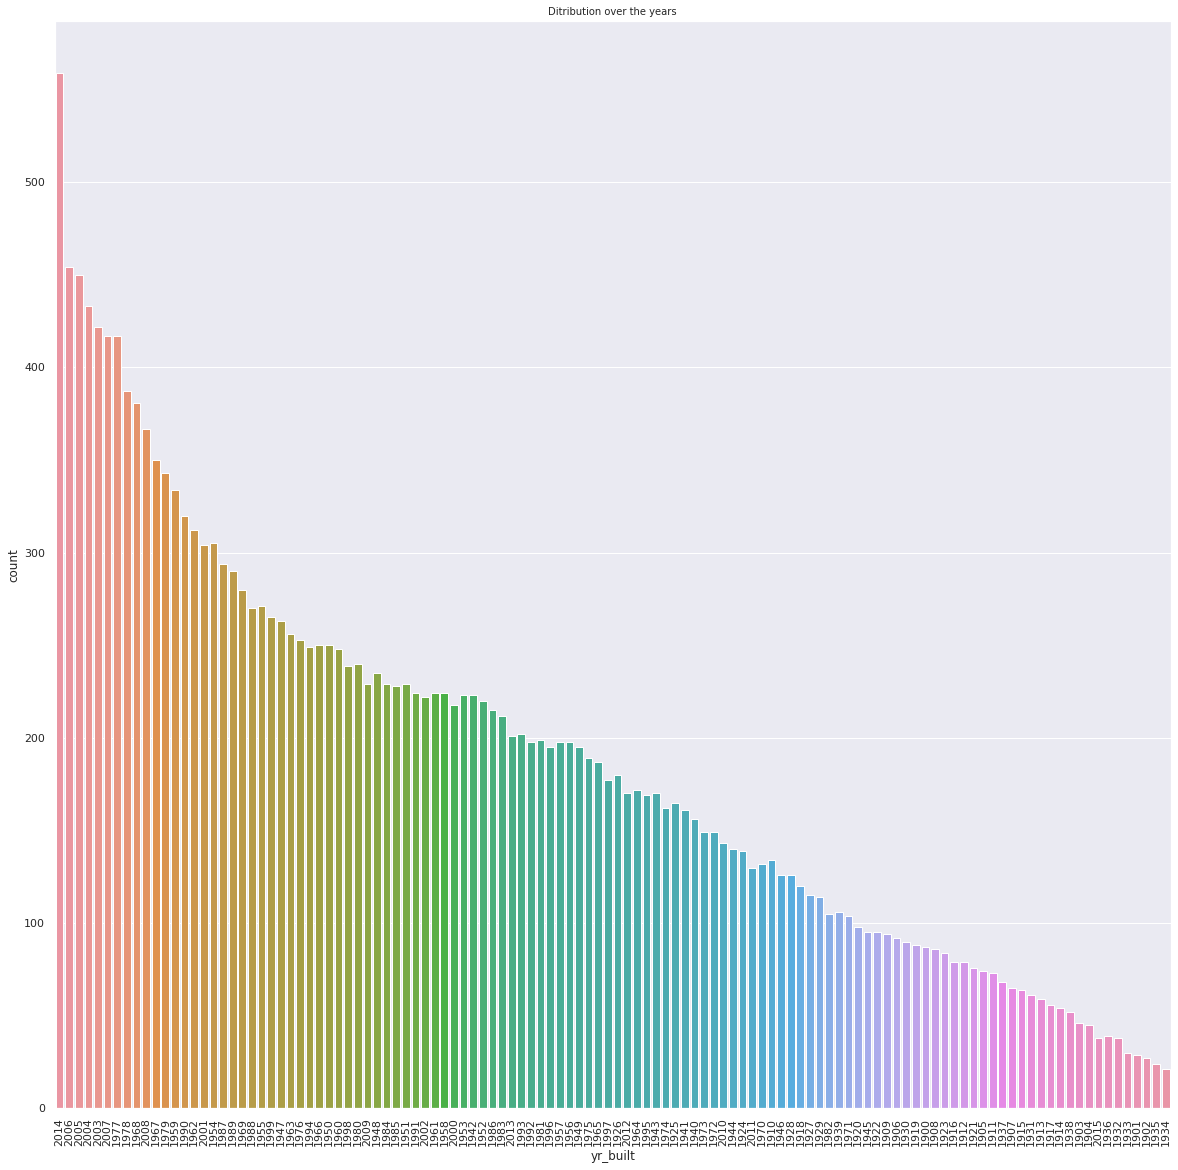

In [37]:
#Comparrison of ditribution of the years

y=sns.countplot(x='yr_built',data=df, order = df.groupby('yr_built')['yr_built'].agg('sum').sort_values(ascending=False).index)
#order=df.groupby('Genre')['Rating'].agg('mean').sort_values(ascending=False).index)

sns.set(rc={'figure.figsize':(20,20)})
plt.title('Ditribution over the years', fontsize = 10)
y.set_xticklabels(y.get_xticklabels(),rotation=90)
plt.show()

Majority of the houses were constructed in 2014. The least houses were consutructed in the year 1934.

### **BIVARIATE**

Figuring out the effect of each independent variable on price.
Our independent variables are;

'bedrooms',

'bathrooms',

'sqft_living',

'sqft_lot',

'floors',

'waterfront',

'view',

'condition',

'grade',

'sqft_above',

'sqft_basement',

'yr_built',

'yr_renovated',

'sqft_living15',

'sqft_lot15'

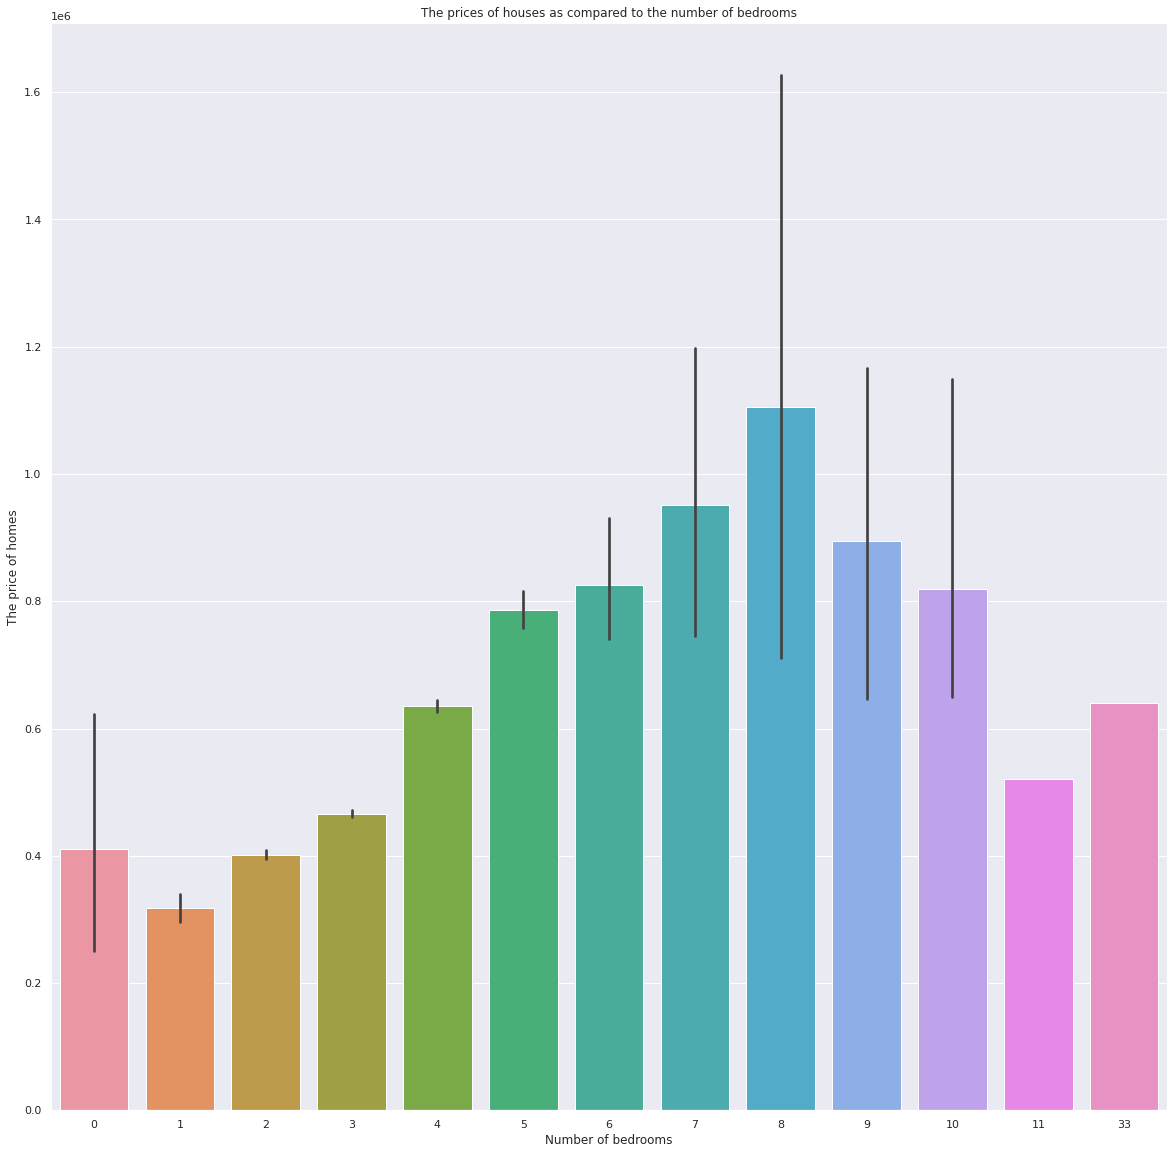

In [24]:
#Creating a dataframe with the sum of prices.
df1 = df.groupby('price').sum()
df1 = df1.reset_index(inplace=True)

#Plotting the graphs comparing the price of houses and number of bedrooms.
sns.barplot(x = df['bedrooms'], y = df['price'], data=df1)
plt.xlabel('Number of bedrooms')
plt.ylabel('The price of homes')
plt.title('The prices of houses as compared to the number of bedrooms')
plt.show()

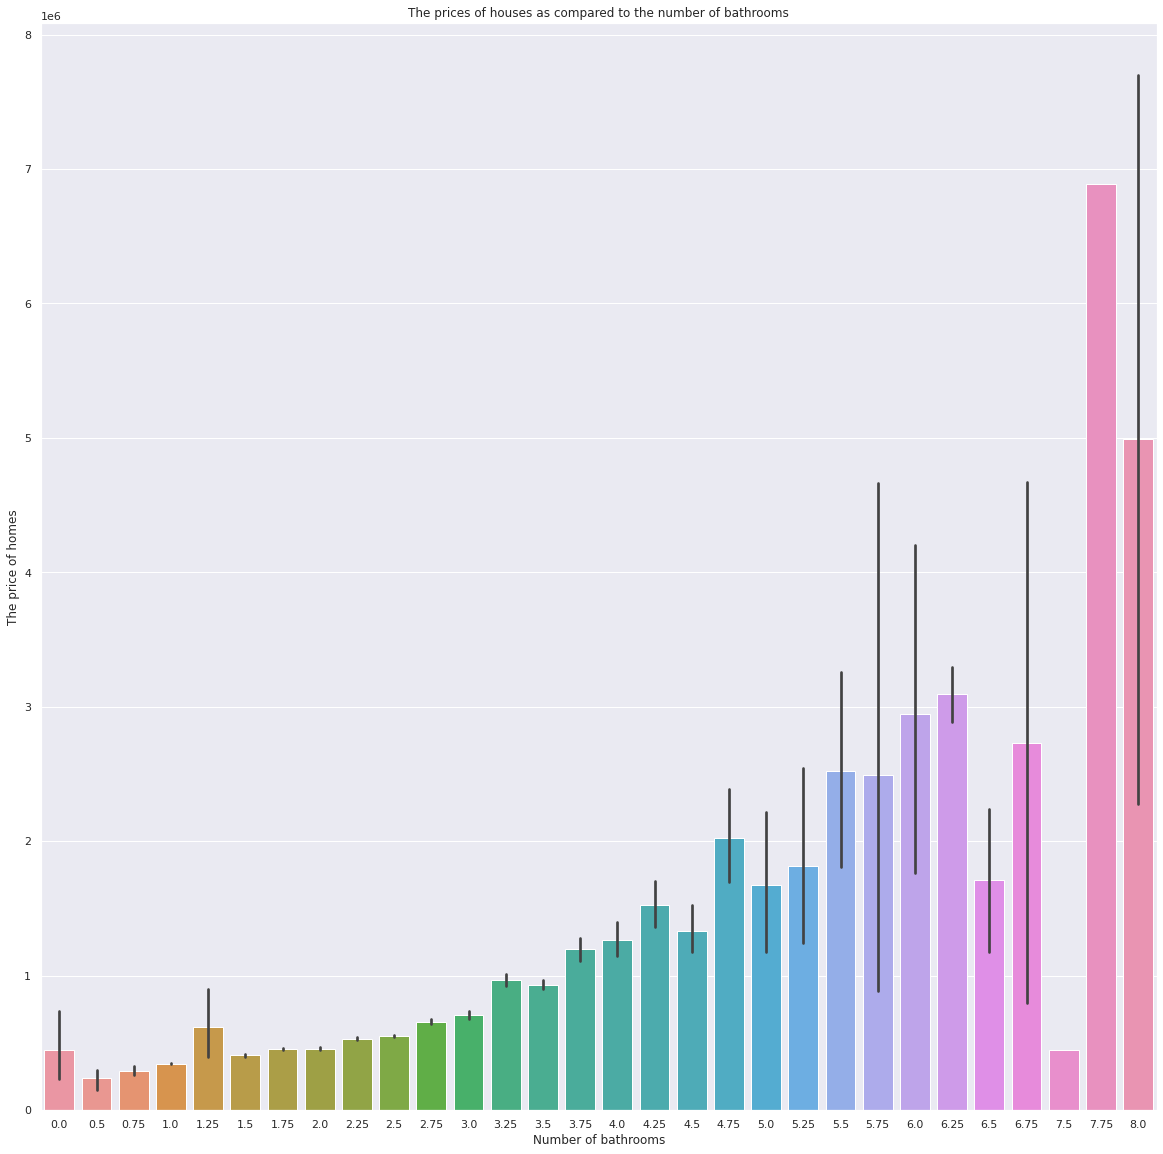

In [25]:
#Plotting the graphs comparing the price of houses and the number of bathrooms.

sns.barplot(x = df['bathrooms'], y = df['price'], data=df1)
plt.xlabel('Number of bathrooms')
plt.ylabel('The price of homes')
plt.title('The prices of houses as compared to the number of bathrooms')
plt.show()

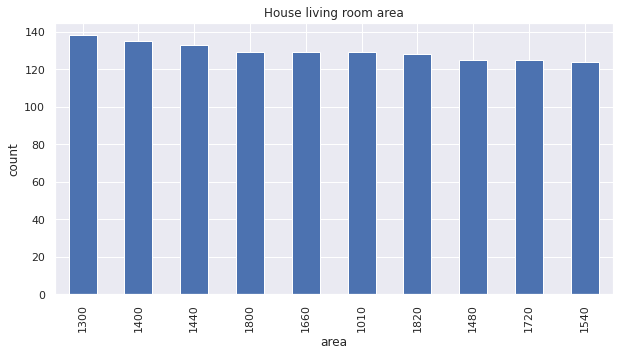

In [26]:
#Plotting the graphs comparing the price of houses and the size of the living room area

plt.figure(figsize = (10,5))
df['sqft_living'].value_counts().head(10).plot.bar()
plt.title('House living room area')
plt.xlabel('area')
plt.ylabel('count')
plt.show()

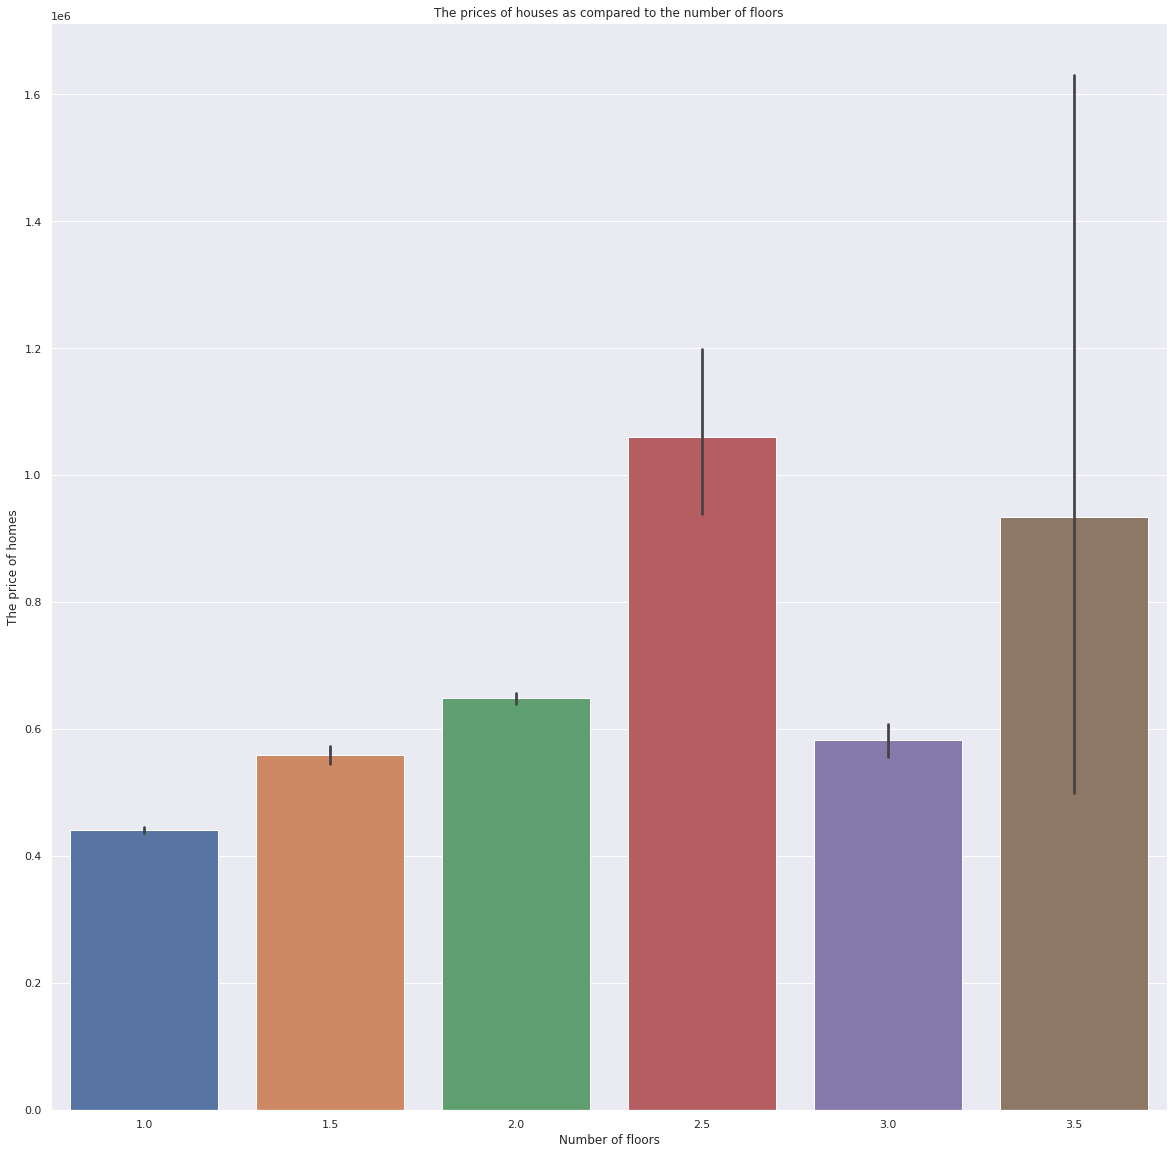

In [27]:
#Plotting the graphs comparing the price of houses and the size of the living room area

sns.barplot(x = df['floors'], y = df['price'], data=df1)
plt.xlabel('Number of floors')
plt.ylabel('The price of homes')
plt.title('The prices of houses as compared to the number of floors')
plt.show()

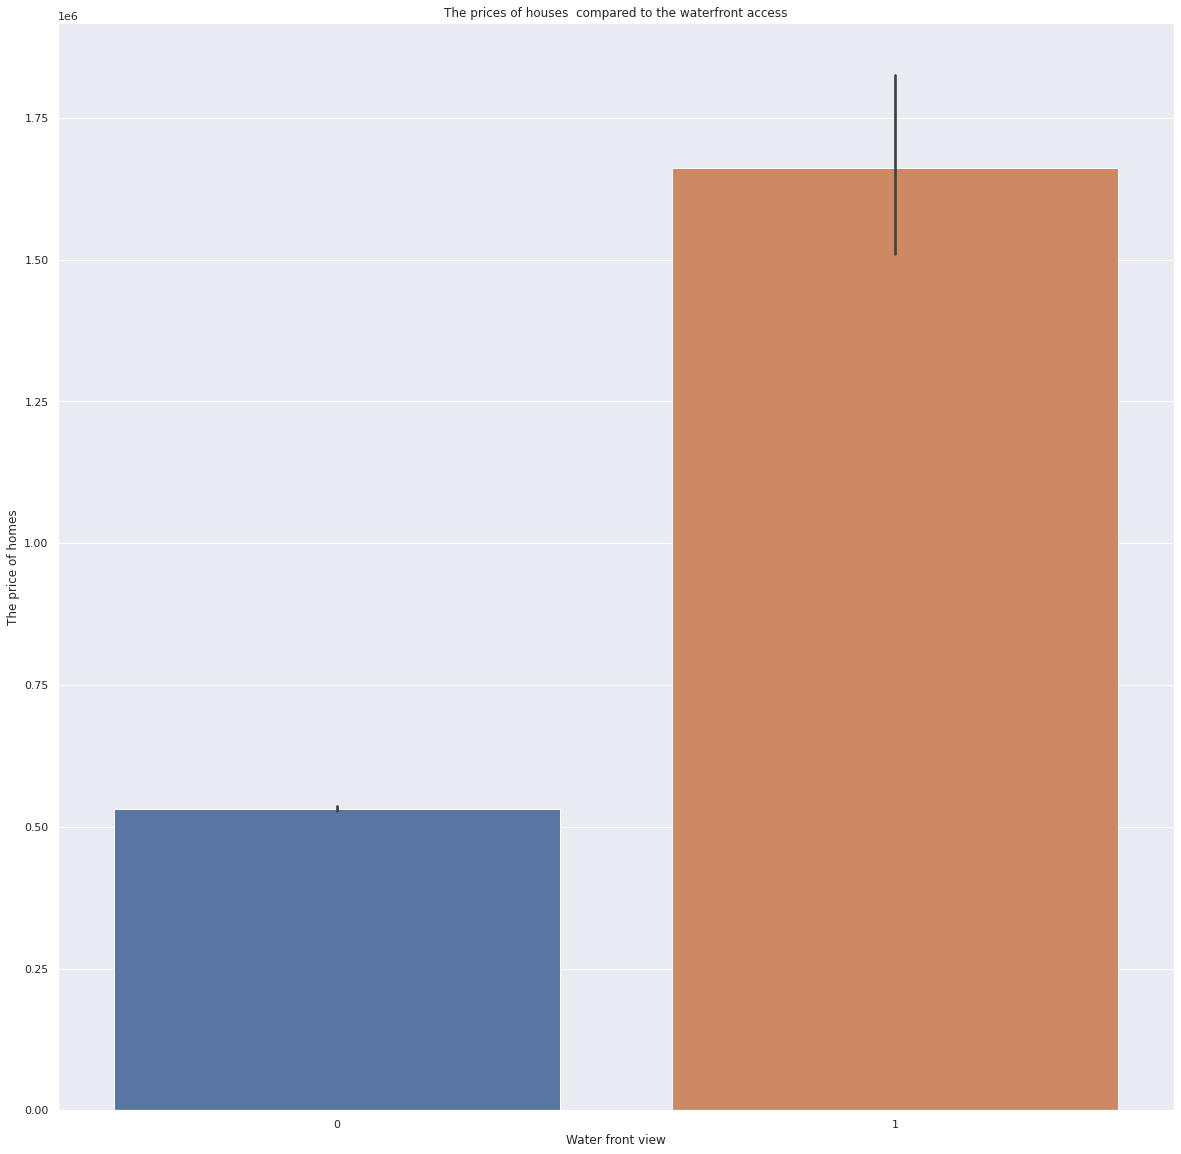

In [28]:
#Plotting the graphs comparing the price og houses and the waterfront variable.

sns.barplot(x = df['waterfront'], y = df['price'], data=df1)
plt.xlabel('Water front view')
plt.ylabel('The price of homes')
plt.title('The prices of houses  compared to the waterfront access')
plt.show()

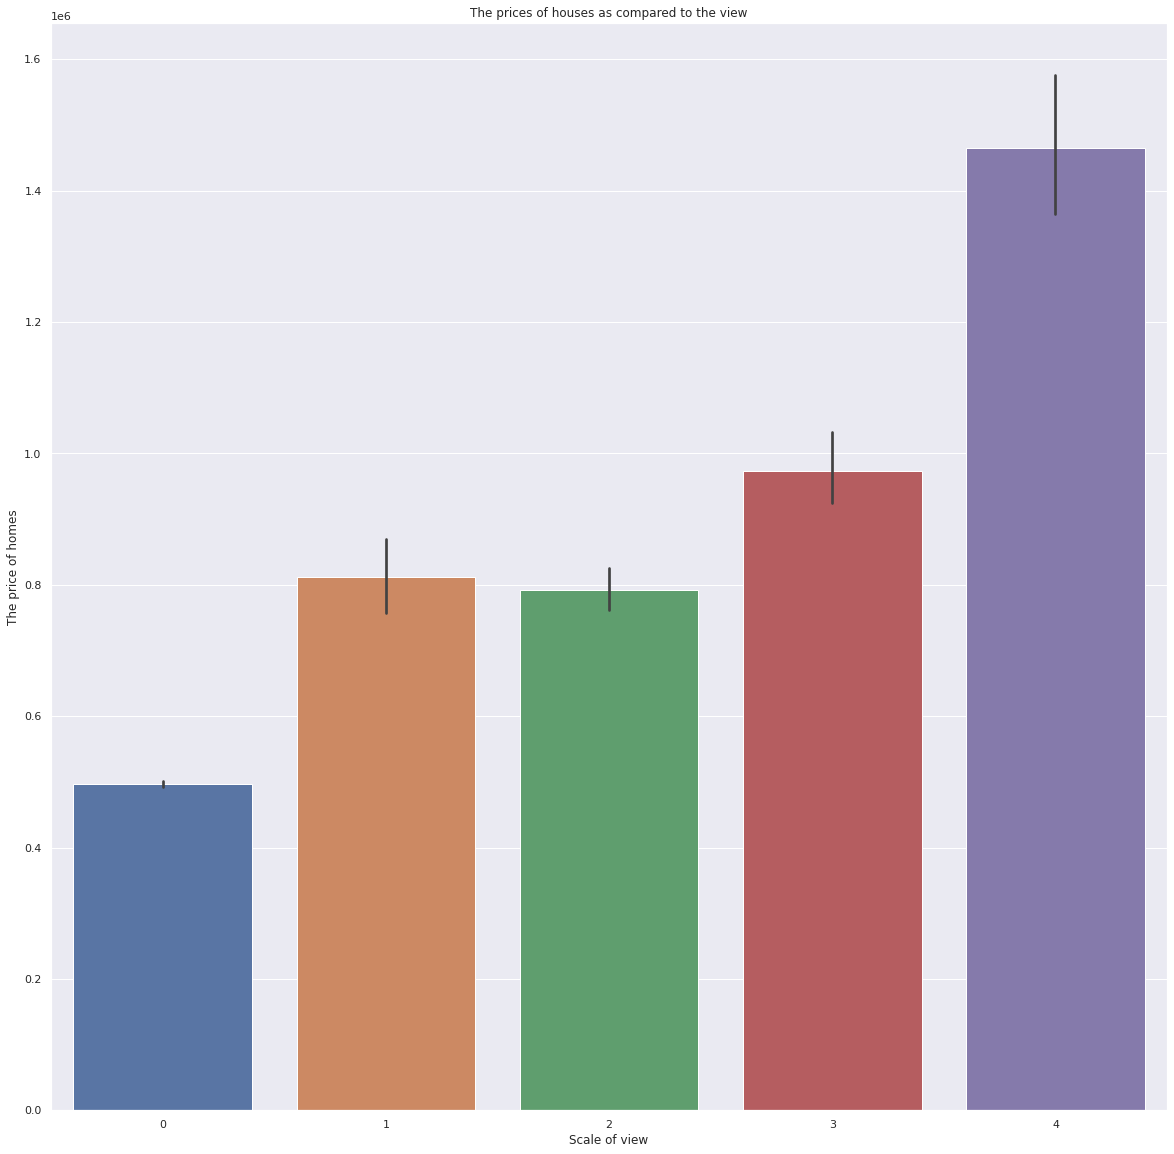

In [29]:
#Plotting the graphs comparing the price of houses and the view.

sns.barplot(x = df['view'], y = df['price'], data=df1)
plt.xlabel('Scale of view')
plt.ylabel('The price of homes')
plt.title('The prices of houses as compared to the view')
plt.show()

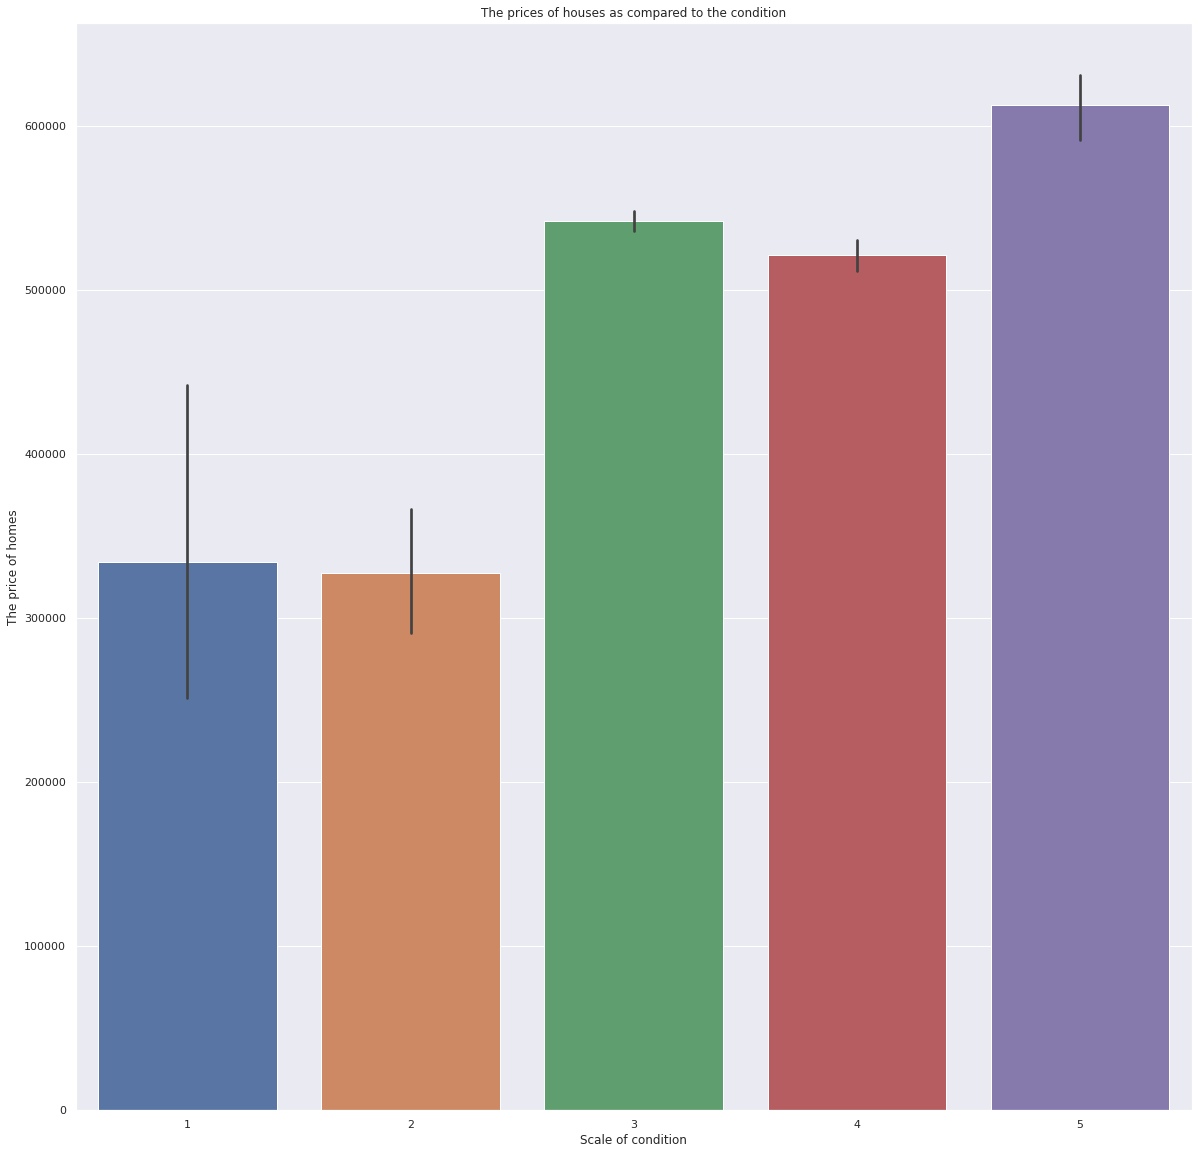

In [30]:
#Plotting the graphs comparing the price of houses and the condition.

sns.barplot(x = df['condition'], y = df['price'], data=df1)
plt.xlabel('Scale of condition')
plt.ylabel('The price of homes')
plt.title('The prices of houses as compared to the condition')
plt.show()


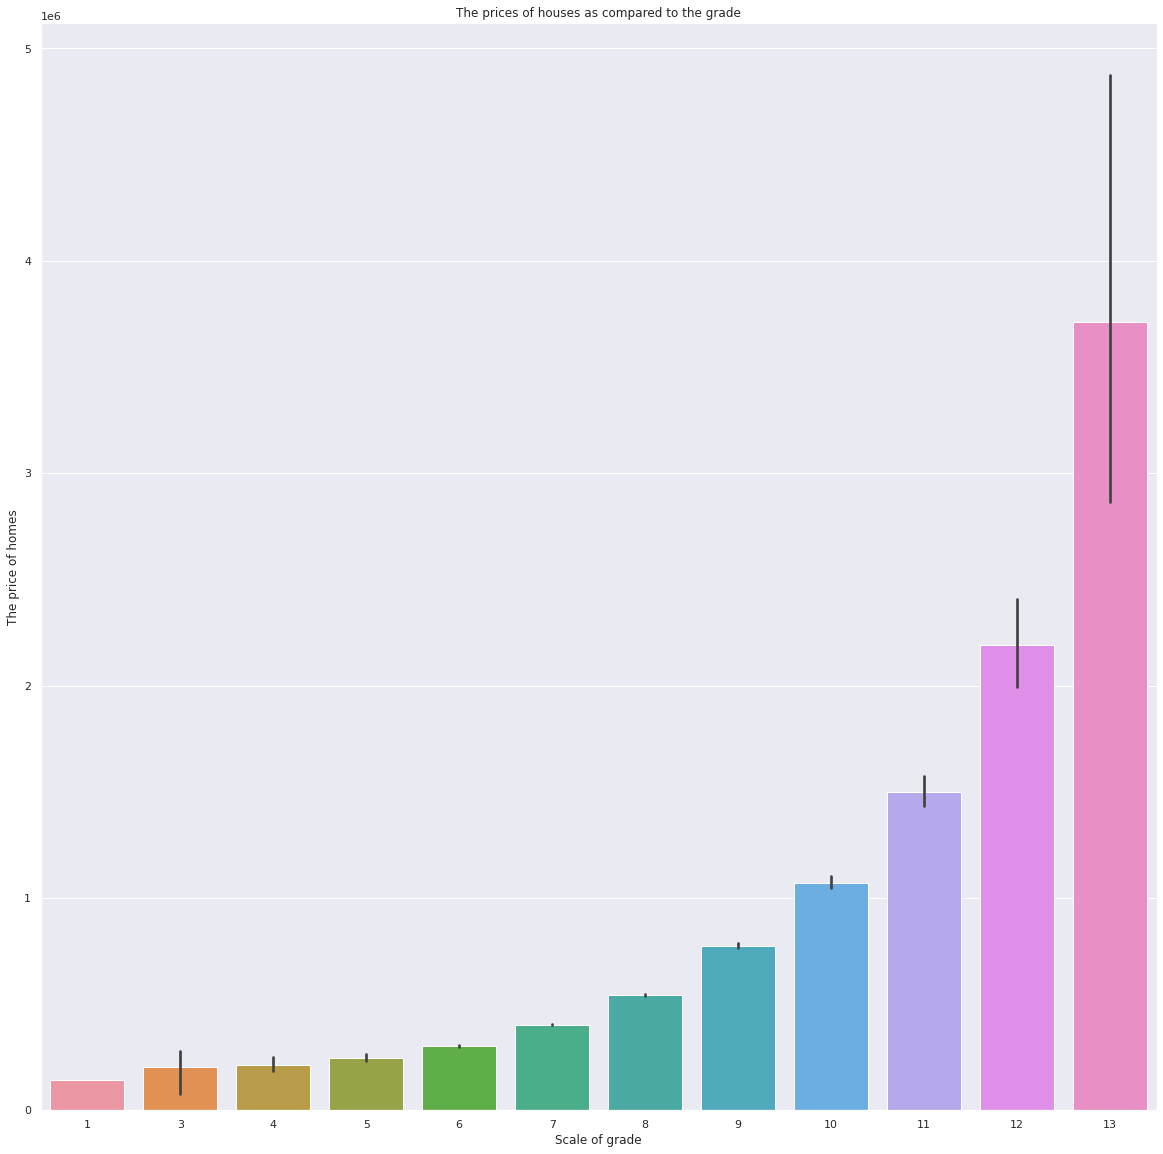

In [31]:
#Plotting the graphs comparing the price og houses and the grade

sns.barplot(x = df['grade'], y = df['price'], data=df1)
plt.xlabel('Scale of grade')
plt.ylabel('The price of homes')
plt.title('The prices of houses as compared to the grade')
plt.show()

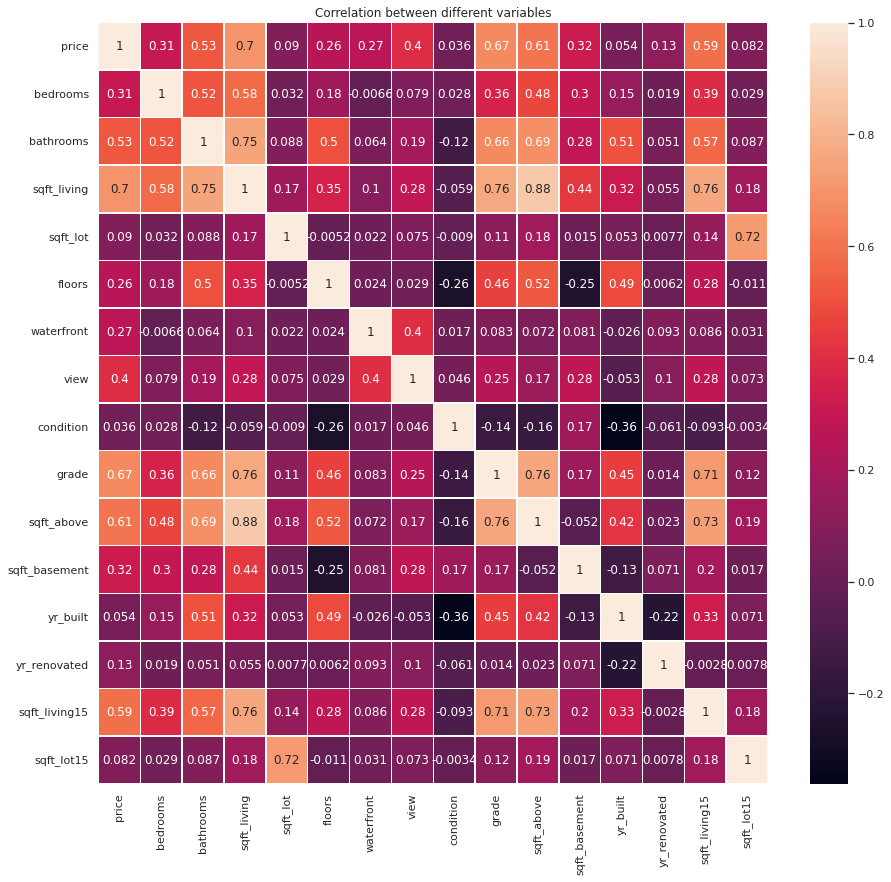

In [32]:
# Create a correlation matrix
corrMatrix = df.corr()
corrMatrix

# Vizualise the correlation matrix using a heat map

fig, ax = plt.subplots(figsize=(15,14)) 
sns.heatmap(corrMatrix, annot=True,  linewidths=.5, ax=ax)
plt.title('Correlation between different variables')
plt.show()

### **MULTI-VARIATE ANALYSIS**

Linear Discriminant Analysis.

In [33]:
#Defining the X and y target variable
X = df.drop(['price'],axis=1)
y = df.price

In [34]:
#import Linear Discriminant Analysismethod from sklearn library
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [35]:
# creating an instance of LDA and train the model
#create an instance of LDA and train the model
lda= LDA()

lda_= lda.fit(X, y)
lda_feat = lda_. transform(X)

In [36]:
#Printing the co-efficients weights of the respective columns

factors = pd.DataFrame(index = X.columns.values, data = lda_.coef_[0].T)
pd.options.display.float_format = '{:.8f}'.format
factors.sort_values(0, ascending=False)

,0
floors,0.61898385
yr_built,0.18399580
sqft_living,0.00291636
sqft_above,0.00227852
sqft_basement,0.00133264
sqft_living15,0.00078560
yr_renovated,0.00048456
sqft_lot15,0.00003784
sqft_lot,-0.00000498
view,-0.10390146


In [38]:
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,3,1.00000000,1180,5650,1.00000000,0,0,3,7,1180,0,1955,0,1340,5650
1,3,2.25000000,2570,7242,2.00000000,0,0,3,7,2170,400,1951,1991,1690,7639
2,2,1.00000000,770,10000,1.00000000,0,0,3,6,770,0,1933,0,2720,8062
3,4,3.00000000,1960,5000,1.00000000,0,0,5,7,1050,910,1965,0,1360,5000
4,3,2.00000000,1680,8080,1.00000000,0,0,3,8,1680,0,1987,0,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50000000,1530,1131,3.00000000,0,0,3,8,1530,0,2009,0,1530,1509
21609,4,2.50000000,2310,5813,2.00000000,0,0,3,8,2310,0,2014,0,1830,7200
21610,2,0.75000000,1020,1350,2.00000000,0,0,3,7,1020,0,2009,0,1020,2007
21611,3,2.50000000,1600,2388,2.00000000,0,0,3,8,1600,0,2004,0,1410,1287


In [39]:
# Reducing the independent variables

X1 = X[['floors', 'yr_built', 'view', 'sqft_living', 'sqft_above', 'sqft_basement', 'yr_renovated', 'sqft_living15', 'sqft_lot', 'sqft_lot15']]
X1

,floors,yr_built,view,sqft_living,sqft_above,sqft_basement,yr_renovated,sqft_living15,sqft_lot,sqft_lot15
0,1.00000000,1955,0,1180,1180,0,0,1340,5650,5650
1,2.00000000,1951,0,2570,2170,400,1991,1690,7242,7639
2,1.00000000,1933,0,770,770,0,0,2720,10000,8062
3,1.00000000,1965,0,1960,1050,910,0,1360,5000,5000
4,1.00000000,1987,0,1680,1680,0,0,1800,8080,7503
...,...,...,...,...,...,...,...,...,...,...
21608,3.00000000,2009,0,1530,1530,0,0,1530,1131,1509
21609,2.00000000,2014,0,2310,2310,0,0,1830,5813,7200
21610,2.00000000,2009,0,1020,1020,0,0,1020,1350,2007
21611,2.00000000,2004,0,1600,1600,0,0,1410,2388,1287


# MULTILINEAR REGRESSION

In [41]:
X = df[['bedrooms', 'sqft_living', 'sqft_lot', 'condition', 'yr_built']]
y = df.price
print('the X array is: ',X)
print('the X array is: ',y)

the X array is:         bedrooms  sqft_living  sqft_lot  condition  yr_built
0             3         1180      5650          3      1955
1             3         2570      7242          3      1951
2             2          770     10000          3      1933
3             4         1960      5000          5      1965
4             3         1680      8080          3      1987
...         ...          ...       ...        ...       ...
21608         3         1530      1131          3      2009
21609         4         2310      5813          3      2014
21610         2         1020      1350          3      2009
21611         3         1600      2388          3      2004
21612         2         1020      1076          3      2008

[21610 rows x 5 columns]
the X array is:  0       221900.00000000
1       538000.00000000
2       180000.00000000
3       604000.00000000
4       510000.00000000
              ...      
21608   360000.00000000
21609   400000.00000000
21610   402101.00000000
2161

In [42]:
#dataset already split 
X1
y

#splitting the data into train and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X1,y,test_size=0.2,random_state=0)

In [44]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X,y)
print(regressor.intercept_)
print(regressor.coef_)

4537751.396961886
[-6.29769792e+04  3.44668230e+02 -3.92090244e-01  1.38743941e+04
 -2.30518897e+03]


In [47]:
#Making predictions
y_pred = regressor.predict(X)

# To compare the actual output values for X_test with the predicted values
# 
df1 = pd.DataFrame({'Actual': y, 'Predicted': y_pred})\
#Checking the accuracy:
print("The OLS Accuracy is :",regressor.score(X, y )* 100)

The OLS Accuracy is : 54.27731486534696


In [48]:
#printing the RMSE

from sklearn import metrics
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))

Mean Squared Error: 61710715570.62675


## Residual plots

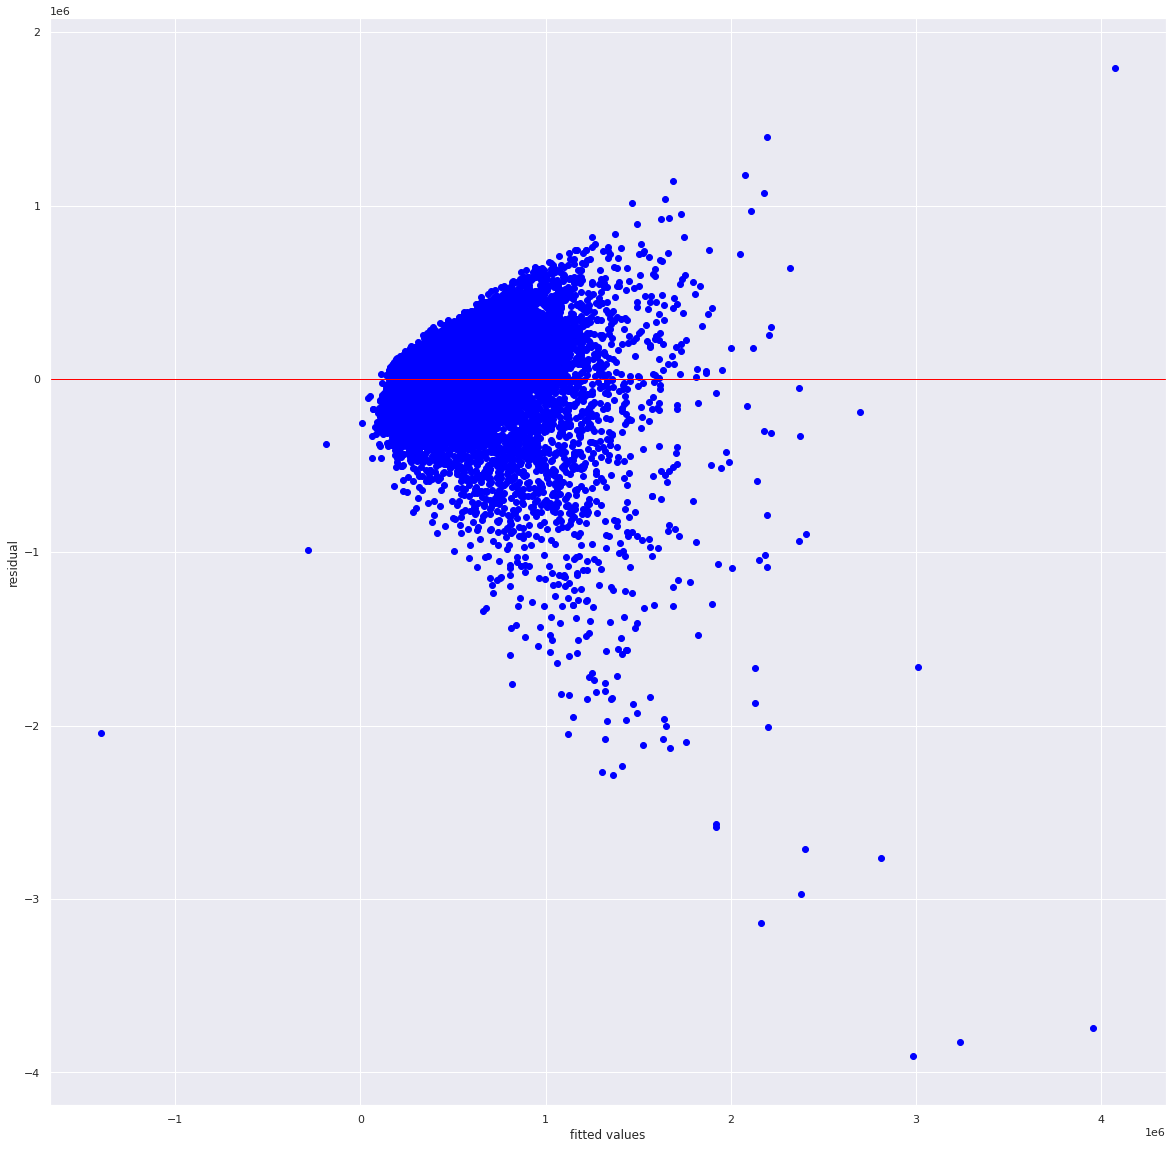

In [49]:
# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(y_pred, y)

# Plot
plt.scatter(y_pred, residuals, color="blue")
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

## Heteroscedasticity test

In [50]:
# The Barlett's test to check for heteroscedasticity

import scipy as sp
test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(p_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

2.1585755258510004e-36
the variances are homogeneous!


The accuracy of our multiple linear regression model is 54.27% and MSE is 61710715570.62675. We will challenge the solution by trying out the other regression techniques with the aim of improving our prediction accuracy

# RIDGE REGRESSION.

In [51]:
# importing the relevant libraries

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [52]:
# Building our model and choosing parameters

model=Ridge(normalize=True)
search=GridSearchCV(estimator=model,param_grid={"alpha":np.logspace(-2,12,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

# We now use the .fit function to run the model and then use the .best_params_ and
# .best_scores_ function to determine the models strength. 
search.fit(X1,y)
search.best_params_

abs(search.best_score_)

57811158112.8976

In [53]:
#printing the best parameter

print(search.best_params_)


{'alpha': 0.01}


In [54]:
# Fitting our model with the ridge information and finding the mean squared error

ridge = Ridge(normalize=True,alpha=0.01)
ridge.fit(X1,y)
y_pred=ridge.predict(X1)
print("Ridge MSE:", mean_squared_error(y,y_pred))

Ridge MSE: 57012105149.8095


In [56]:
#Checking the accuracy:

print("Accuracy:",ridge.score(X1, y )* 100)

Accuracy: 57.75860790910619


The Ridge MSE is slightly lower than OLS MSE which means that ridge is better that OLS.

# LASSO REGRESSION.

In [57]:
# importing the relevant libraries

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
import warnings
warnings.filterwarnings("ignore")

In [58]:
# building our model

model=Lasso(normalize=True)
search=GridSearchCV(model,param_grid={"alpha":np.concatenate((np.arange(0.1,2,0.1),np.arange(2, 5, 0.5)))},cv=10)

# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
search.fit(X_train, y_train) 

print("lasso best parameters:", search.best_params_)

lasso best parameters: {'alpha': 4.5}


In [59]:
# Creating lasso regression with alpha value of 4.5

model=Lasso(alpha= 4.5,normalize=True)
model.fit(X1,y)
y_pred=model.predict(X_test)
print("lasso MSE:", mean_squared_error(y_test,y_pred))

lasso MSE: 53222504196.750015


In [60]:
#Checking the accuracy:

print("Accuracy:",model.score(X_test, y_test )* 100)

Accuracy: 59.50203316414976


The MSE  is smaller than the Ridge and Multilinear MSE.

# ELASTIC NET REGRESSION

In [61]:
# Import the libraries

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

In [68]:
# Building our model.

model=ElasticNet(normalize=True)
search=GridSearchCV(model,param_grid={'alpha':np.logspace(-5,2,8),"l1_ratio":[0.2,0.4,0.6,0.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [69]:
# fitting our model and display the best parameters and the best results we can get with that setup.
# 
search.fit(X1,y)
search.best_params_
abs(search.best_score_)

print("Elastic net best parameters:", search.best_params_)

Elastic net best parameters: {'alpha': 1e-05, 'l1_ratio': 0.8}


In [73]:
# Setting our hyperparameters to the recommended values and run on the data

elastic=ElasticNet(normalize=True,alpha=1e-05,l1_ratio= 0.8)
elastic.fit(X1,y)
y_pred=elastic.predict(X1)

print("Elastic Net MSE:", mean_squared_error(y,y_pred))

Elastic Net MSE: 57064314325.42624


In [74]:
#Checking the accuracy:

print("Accuracy:",elastic.score(X_test, y_test )* 100)

Accuracy: 59.42336170524727


# QUANTILE REGRESSION

In [76]:
# Splitting data into feature and target

X = df.drop(['price','sqft_above'],1)
y = df['price']

In [83]:
# Using the python package statsmodels for Quantile Regression
#
import statsmodels.formula.api as smf
#Performing a qauntile regression of the 50th percentile.
import statsmodels.formula.api as smf 
mod =smf.quantreg('y ~ X',df)
res = mod.fit(q=.5)

print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.3974
Model:                       QuantReg   Bandwidth:                   2.405e+04
Method:                 Least Squares   Sparsity:                    3.392e+05
Date:                Mon, 25 Apr 2022   No. Observations:                21610
Time:                        06:02:13   Df Residuals:                    21595
                                        Df Model:                           14
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.334e+06   1.09e+05     39.892      0.000    4.12e+06    4.55e+06
X[0]       -2.528e+04   1590.470    -15.897      0.000   -2.84e+04   -2.22e+04
X[1]        1.469e+04   2740.894      5.360      0.000    9317.765    2.01e+04
X[2]          90.7270      3.061     29.635      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
